In [31]:
import sklearn
import pandas as pd
import seaborn as sns
data1 = pd.read_excel("CW_Data.xlsx")
display(data1)


,Index,Gender,Programme,Grade,Total,MCQ,Q1,Q2,Q3,Q4,Q5
0,1,1,3,3,45.0,21,8,4,2,10.0,0
1,2,2,3,3,43.0,21,4,2,8,8.0,0
2,3,1,4,2,26.0,24,0,0,2,0.0,0
3,4,2,1,3,30.0,24,4,0,0,0.0,2
4,5,1,2,3,27.0,21,0,2,4,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
614,615,2,1,2,55.0,33,6,4,4,8.0,0
615,616,2,4,2,41.0,27,6,4,4,0.0,0
616,617,2,1,2,73.0,36,8,8,11,10.0,0
617,618,2,1,2,77.0,42,8,8,6,10.0,3


In [32]:
#决策树与随机森林

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#先去掉index
data = data1.drop(columns=['Index'])
#特征矩阵
X = data.drop(['Programme'], axis=1)
y = data['Programme']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#归一化
from sklearn.preprocessing import MinMaxScaler

# 创建一个MinMaxScaler对象
scaler = MinMaxScaler()

# 对训练集进行归一化
X_train = scaler.fit_transform(X_train)

# 对测试集进行归一化
X_test = scaler.transform(X_test)


In [34]:
#CART算法
dt_classifier_gini = DecisionTreeClassifier(criterion='gini')
dt_classifier_gini = dt_classifier_gini.fit(X_train, y_train)

dt_pred = dt_classifier_gini.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)

print("模型的准确率为: {:.2f}%".format(dt_accuracy * 100))

模型的准确率为: 58.06%


In [35]:
# 定义一个模型评估函数
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import f1_score

def evaluate(X_test, y_test, X_train, y_train, clf):
    # 查看给定测试数据和标签的平均精度
    acc_test = clf.score(X_test, y_test)
    acc_train = clf.score(X_train, y_train)
    print('Average accuracy on the test set: {}'.format(acc_test))
    print('Average accuracy on the training set: {}'.format(acc_train))

    # 使用混淆矩阵查看分类结果
    from sklearn.metrics import confusion_matrix  # 导入混淆矩阵计算函数
    y_pred = clf.predict(X_test)
    print('Confusion matrix')
    print(confusion_matrix(y_test, y_pred))  # 打印出混淆矩阵的分类结果

    #交叉验证
    scores = cross_val_score(dt_classifier_gini, X_train, y_train, cv=5, scoring='accuracy')
    print("Cross-validation scores:", scores)
    print("Mean accuracy:", scores.mean())
    
    # 计算 F1 分数
    f1 = f1_score(y_test, y_pred, average='macro')
    print('F1 Score: {}'.format(f1))

Evaluation based on Gini impurity as the feature splitting criterion:
Feature Importances: [0.02569693 0.11891009 0.35685385 0.10541575 0.04375339 0.06959371
 0.08089065 0.12045726 0.07842837]


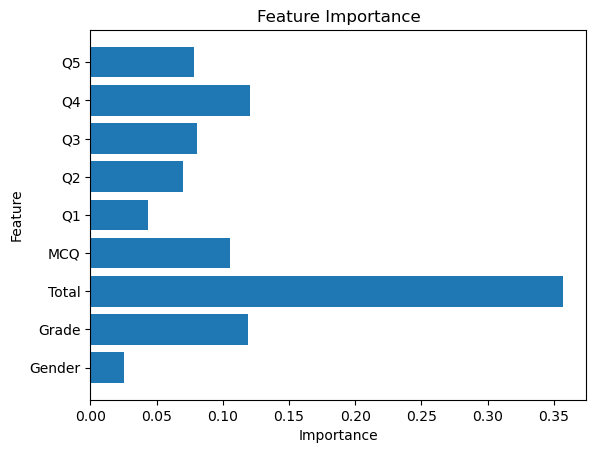

Average accuracy on the test set: 0.5806451612903226
Average accuracy on the training set: 0.9870689655172413
Confusion matrix
[[43  8  0 11]
 [ 8 13  0  8]
 [ 0  0  6  0]
 [16 14  0 28]]
Cross-validation scores: [0.49462366 0.49462366 0.46236559 0.51612903 0.52173913]
Mean accuracy: 0.49789621318373073
F1 Score: 0.6515624999999999


In [36]:
import matplotlib.pyplot as plt
print('Evaluation based on Gini impurity as the feature splitting criterion:')
# 获取特征重要性
importances = dt_classifier_gini.feature_importances_
print("Feature Importances:", importances)
features = ['Gender', 'Grade','Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']

# 可视化特征重要性
plt.barh(features, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

evaluate(X_test, y_test, X_train, y_train, dt_classifier_gini)

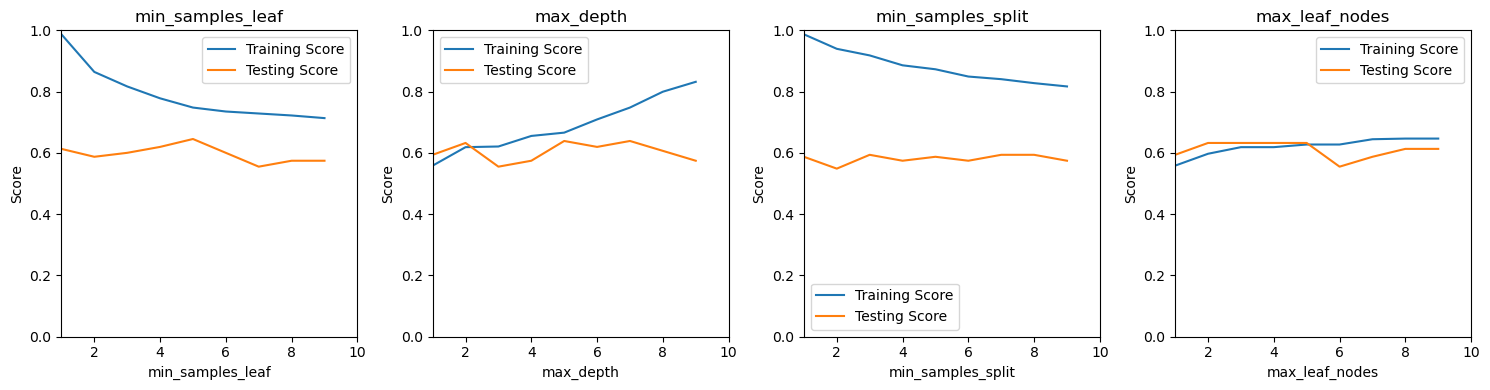

In [37]:
#可视化决策树模型在不同参数设置下的训练集和测试集的得分
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

def train(X_train, y_train, X_test, y_test, a, b, c, d, e, f):
    clf = DecisionTreeClassifier(criterion=a,
                                 splitter=b,
                                 min_samples_leaf=c,
                                 max_depth=d,
                                 min_samples_split=e,
                                 max_leaf_nodes=f)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    return train_scores, test_scores

X_range = np.arange(1, 10, 1)
title_name = ["min_samples_leaf", "max_depth", "min_samples_split", "max_leaf_nodes"]

fig, axes = plt.subplots(1, 4, figsize=(15, 4))  # 创建一行四列的子图

for t in range(1, 5):
    train_scores = []
    test_scores = []
    for i in range(1, 10):
        if t == 1:
            c = i; d = None; e = 2; f = None
        elif t == 2:
            c = 1; d = i; e = 2; f = None
        elif t == 3:
            c = 1; d = None; e = i + 1; f = None
        elif t == 4:
            c = 1; d = None; e = 2; f = i + 1
        # 调用函数进行训练
        train_scores, test_scores = train(X_train, y_train, X_test, y_test, 'gini', 'best', c, d, e, f)
    ax = axes[t-1]  # 使用对应的子图
    ax.plot(X_range, train_scores, label="Training Score")
    ax.plot(X_range, test_scores, label="Testing Score")
    ax.set_xlabel(title_name[t - 1])
    ax.set_ylabel("Score")
    ax.set_ylim(0, 1.0)
    ax.set_xlim(1, 10)
    ax.set_title(title_name[t - 1])
    ax.legend(loc="best")

plt.tight_layout()
plt.show()

In [38]:
 clf = DecisionTreeClassifier(criterion='gini',
                                 splitter='best',
                                 min_samples_leaf=8,
                                 max_depth=6,
                                 min_samples_split=6,
                                 max_leaf_nodes=6)
clf.fit(X_train, y_train) # 基于训练集拟合模型
print('Evaluation based on Gini impurity as the feature splitting criterion:') 
# 调用定义的求值函数，对gini模型求值
evaluate(X_test, y_test, X_train, y_train, clf)

Evaluation based on Gini impurity as the feature splitting criterion:
Average accuracy on the test set: 0.632258064516129
Average accuracy on the training set: 0.6271551724137931
Confusion matrix
[[51  0  0 11]
 [13  0  0 16]
 [ 0  0  6  0]
 [16  1  0 41]]
Cross-validation scores: [0.52688172 0.49462366 0.48387097 0.55913978 0.5       ]
Mean accuracy: 0.5129032258064516
F1 Score: 0.592275877487145


Optimal number of features : 9


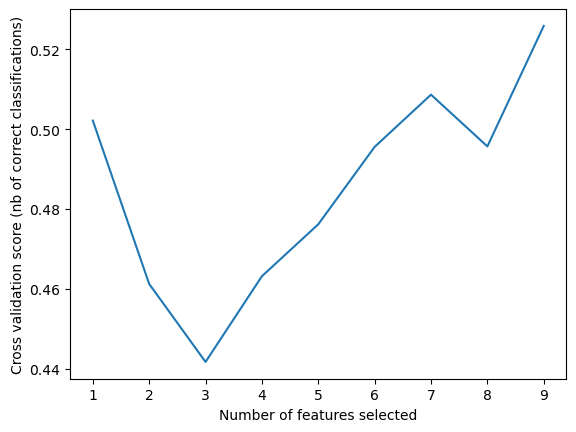

Accuracy with selected features: 0.56


In [39]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# 假设你已经有了特征矩阵 X 和目标变量 y

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 初始化决策树分类器
dt_classifier = DecisionTreeClassifier()

# 初始化 RFECV，指定基础模型和评估指标
rfecv = RFECV(estimator=dt_classifier, scoring='accuracy')

# 进行特征选择
rfecv.fit(X_train, y_train)

# 输出最佳特征数量
print("Optimal number of features : %d" % rfecv.n_features_)

# 绘制特征重要性排名
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

# 获取选择的最佳特征
selected_features = X.columns[rfecv.support_]

# 使用选择的最佳特征重新训练模型
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)
dt_classifier.fit(X_train_selected, y_train)

# 在测试集上评估模型
accuracy = dt_classifier.score(X_test_selected, y_test)
print("Accuracy with selected features: {:.2f}".format(accuracy))


In [40]:
#随机森林
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=25, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

evaluate(X_test, y_test, X_train, y_train, rnd_clf)

Average accuracy on the test set: 0.6516129032258065
Average accuracy on the training set: 0.7672413793103449
Confusion matrix
[[51  1  0 10]
 [13  3  0 13]
 [ 0  0  6  0]
 [12  5  0 41]]
Cross-validation scores: [0.49462366 0.53763441 0.50537634 0.53763441 0.51086957]
Mean accuracy: 0.5172276764843385
F1 Score: 0.6422890797914244


In [41]:
#SVM

In [42]:
#先用非线性SVM
#选择非线性支持向量机（SVM）中多项式核的最佳阶数
from sklearn import svm
def best(X_train, y_train, X_test, y_test):
    scores = []  # List to store accuracy scores for different degree values
    # Using a for loop to iteratively select degree values in the range [1,15) for model training and testing evaluation
    for i in range(1, 15):
        clf = svm.SVC(kernel='poly', degree=i)  # Kernel type is polynomial, selecting different degree values
        clf.fit(X_train, y_train)  # Training using the training set
        score = clf.score(X_test, y_test)  # Evaluating using classification accuracy
        scores.append(score)  # Storing the accuracy score in the list
        print('the accuracy_score is ', score)  # Viewing the score for different degrees
    best_degree = scores.index(np.max(scores)) + 1  # Finding the optimal degree value through the index of the maximum value
    print('the best degree is ', best_degree)  # Viewing the optimal degree value

best(X_train, y_train, X_test, y_test)

the accuracy_score is  0.5935483870967742
the accuracy_score is  0.6193548387096774
the accuracy_score is  0.6
the accuracy_score is  0.5870967741935483
the accuracy_score is  0.5870967741935483
the accuracy_score is  0.6
the accuracy_score is  0.6064516129032258
the accuracy_score is  0.6387096774193548
the accuracy_score is  0.6387096774193548
the accuracy_score is  0.6387096774193548
the accuracy_score is  0.6387096774193548
the accuracy_score is  0.6258064516129033
the accuracy_score is  0.6129032258064516
the accuracy_score is  0.6258064516129033
the best degree is  8


In [43]:
#发现 best degree 是 1
# 在进行线性svm的 Model training
#线性SVM
from sklearn import svm
from sklearn.svm import SVC
# Instantiating a linear support vector machine
clf_linear = SVC(kernel='linear', C=0.1, probability=True)
# Model training
clf_linear.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', probability=True)

In [58]:
#重新定义一个非线性SVM
# Model training
from sklearn import svm
clf_poly = svm.SVC(kernel='poly', degree=8, coef0=1, C=0.2)
clf_poly.fit(X_train, y_train)

SVC(C=0.2, coef0=1, degree=8, kernel='poly')

In [59]:
#比较一下哪个准确度更好
from sklearn.model_selection import cross_val_score
# 使用交叉验证评估线性模型的准确率
linear_scores = cross_val_score(clf_linear, X, y, cv=5)

# 使用交叉验证评估非线性模型的准确率
nonlinear_scores = cross_val_score(clf_poly, X, y, cv=5)

# 计算平均准确率
linear_mean_score = linear_scores.mean()
nonlinear_mean_score = nonlinear_scores.mean()

# 打印结果
print("Linear Model Mean Accuracy:", linear_mean_score)
print("Nonlinear Model Mean Accuracy:", nonlinear_mean_score)

#结果是线性更好，选择线性SVM模型

Linear Model Mean Accuracy: 0.6236428009441386
Nonlinear Model Mean Accuracy: 0.6058484133228429


In [46]:
# 为了可视化，我对原数据进行降维
# 再次将数据拆分为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Programme', 'MCQ', 'Gender']), data['Programme'], test_size=0.20, random_state=42)
#去掉了部分没有用的特征

# 标准化数据
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA降维
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # 假设我们要将数据降维到2维
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 使用降维后的数据训练SVM模型
from sklearn.svm import SVC
clf_linear = SVC(kernel='linear', C=0.1)
clf_linear.fit(X_train_pca, y_train)

SVC(C=0.1, kernel='linear')

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = clf_linear.predict(X_test_pca)
print(classification_report(y_test, y_pred, zero_division=1))
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           1       0.63      0.76      0.69        50
           2       1.00      0.00      0.00        21
           3       1.00      1.00      1.00         5
           4       0.61      0.75      0.67        48

    accuracy                           0.64       124
   macro avg       0.81      0.63      0.59       124
weighted avg       0.70      0.64      0.58       124

[[38  0  0 12]
 [10  0  0 11]
 [ 0  0  5  0]
 [12  0  0 36]]
Accuracy: 0.6370967741935484


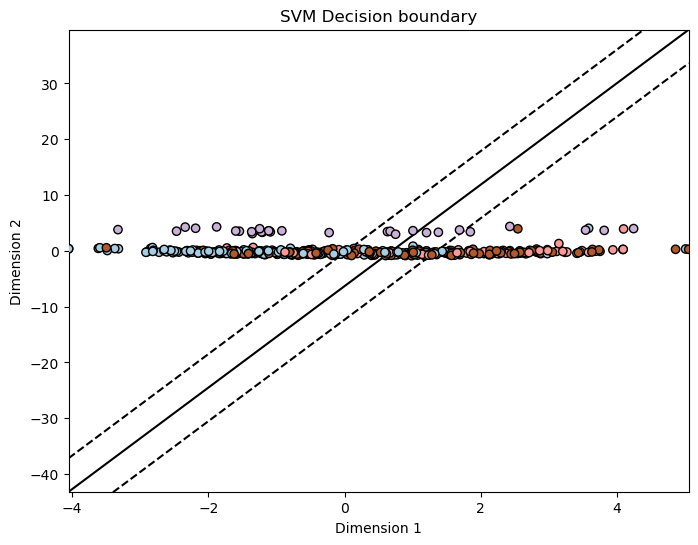

In [48]:
#可视化支持向量机（SVM）的决策边界
import numpy as np
import matplotlib.pyplot as plt

# 获得划分超平面
w = clf_linear.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(min(X_train_pca[:,0]), max(X_train_pca[:,0]))
yy = a * xx - (clf_linear.intercept_[0]) / w[1]

# 画出与超平面平行, 距离为1的线
margin = 1 / np.sqrt(np.sum(clf_linear.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# 画出线条
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.plot(xx, yy, '-k')
plt.plot(xx, yy_down, '--k')
plt.plot(xx, yy_up, '--k')

# 画出支持向量
plt.scatter(clf_linear.support_vectors_[:, 0], clf_linear.support_vectors_[:, 1], s=100, facecolors='none', zorder=10, edgecolors='none')

# 画出点
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, zorder=10, cmap=plt.cm.Paired, edgecolors='k')

# 设定图片范围
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# 设定图片布局
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('SVM Decision boundary')

# 显示图片
plt.show()

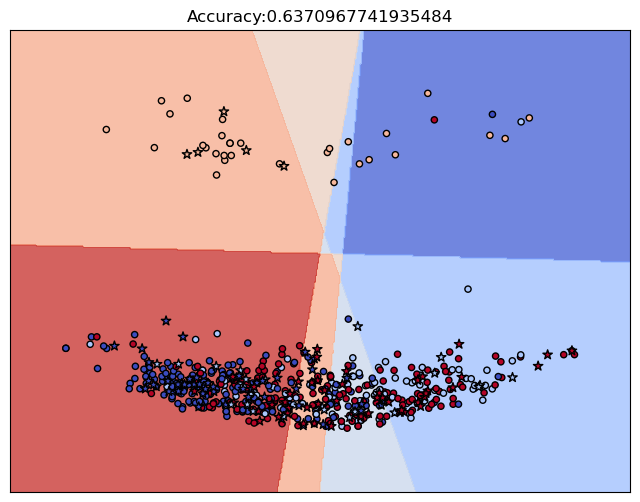

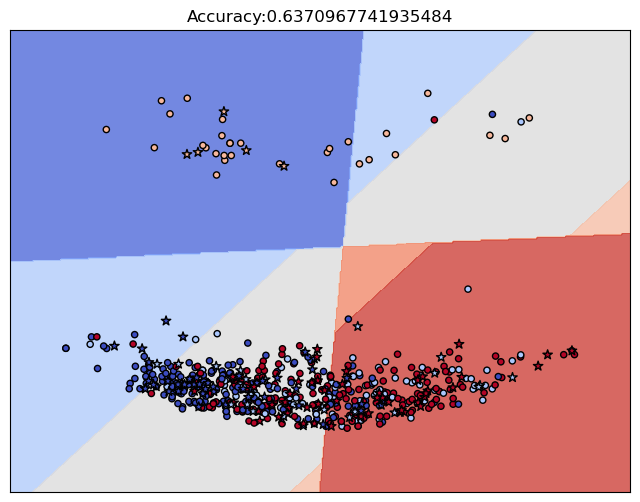

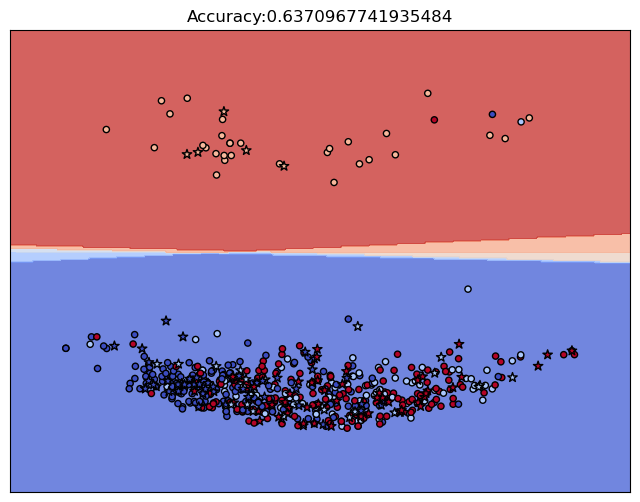

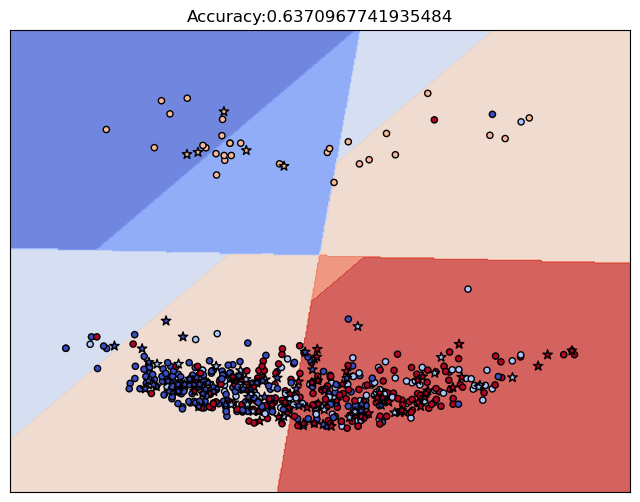

In [49]:
import numpy as np
import matplotlib.pyplot as plt
#绘制升级版的不同类别的决策边界
#星形是测试样本，圆形是训练样本
#背景的颜色显示的是分类器对每个位置的预测结果
def Visualization(clf, x_train, x_test, y_train, y_test, class_index=0):
    # 计算最小和最大值
    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1

    # 生成网格矩阵
    XX, YY = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # 计算样本点到超平面的距离
    input_array = np.c_[XX.ravel(), YY.ravel()] 
    Z = clf.decision_function(input_array)
    Z = Z[:, class_index]  # 使用特定类别的决策功能
    Z = Z.reshape(XX.shape)   # Now XX.shape and Z.shape should match

    # 绘制决策边界
    plt.contourf(XX, YY, Z, cmap=plt.cm.coolwarm, alpha=0.8)  # 填充颜色

    # 绘制训练集样本
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

    # 绘制测试集样本
    plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=50, marker='*', edgecolors='k')

    plt.xlim(XX.min(), XX.max())
    plt.ylim(YY.min(), YY.max())
    plt.xticks(())
    plt.yticks(())
    plt.title('Accuracy:{}'.format(clf.score(x_test, y_test))) # 在标题中显示平均精度
    plt.show()

# 使用不同的类别指数调用Visualization函数
num_classes = 4  # 有4个类别
for i in range(num_classes):
    plt.figure(figsize=(8, 6))
    Visualization(clf_linear, X_train_pca, X_test_pca, y_train, y_test, class_index=i)

In [50]:
from sklearn.metrics import classification_report

y_pred = clf_linear.predict(X_test_pca)  # Getting the model's predictions on the test set
print(classification_report(y_test, y_pred, target_names=None, zero_division=1))

              precision    recall  f1-score   support

           1       0.63      0.76      0.69        50
           2       1.00      0.00      0.00        21
           3       1.00      1.00      1.00         5
           4       0.61      0.75      0.67        48

    accuracy                           0.64       124
   macro avg       0.81      0.63      0.59       124
weighted avg       0.70      0.64      0.58       124



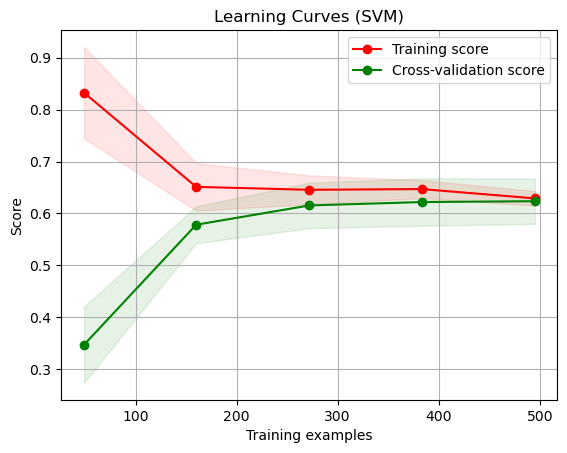

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# 使用上面定义的函数绘制学习曲线
title = "Learning Curves (SVM)"
plot_learning_curve(clf_linear, title, X, y, cv=5, n_jobs=-1)

plt.show()


In [52]:
#贝叶斯

In [53]:
#朴素贝叶斯法
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# 加载数据
data = pd.read_excel("CW_Data.xlsx") 

# 定义一个功能，接受一个特征列表，输出准确率
def evaluate_features(feature_cols):
    # 选取特征和目标变量
    X = data[feature_cols]
    y = data['Programme']  # 确保这是你数据集中代表课程的列名

    # 划分数据集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # 朴素贝叶斯模型训练
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    # 测试模型
    y_pred = gnb.predict(X_test)

    # 准确率输出
    accuracy = accuracy_score(y_test, y_pred)

    # 计算 F1 分数
    f1 = f1_score(y_test, y_pred, average='micro')
    
    print(f"Features: {feature_cols}")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}\n")
    return accuracy,f1

# 我们可以很容易地试用不同的特征集合
feature_sets = [
    ['Gender', 'Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5'],
    ['Gender', 'Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q5'],
    ['Gender', 'Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q5'],
    ['Gender', 'Grade', 'Total', 'Q1', 'Q2', 'Q5'],
    ['Grade', 'Total','Q1', 'Q2', 'Q5']
]

# 循环遍历每个特征集，评估每个的准确度
for feature_set in feature_sets:
    evaluate_features(feature_set)

#可以得知不同的特征可能对模型的影响程度不同。某些特征可能对模型的决策过程影响巨大，而有些特征的影响相对较小。这通常取决于这些特征与目标变量之间的关联程度

Features: ['Gender', 'Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']
Accuracy: 0.6129032258064516
F1 Score: 0.6129032258064516

Features: ['Gender', 'Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q5']
Accuracy: 0.6344086021505376
F1 Score: 0.6344086021505376

Features: ['Gender', 'Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q5']
Accuracy: 0.6397849462365591
F1 Score: 0.6397849462365591

Features: ['Gender', 'Grade', 'Total', 'Q1', 'Q2', 'Q5']
Accuracy: 0.6182795698924731
F1 Score: 0.6182795698924731

Features: ['Grade', 'Total', 'Q1', 'Q2', 'Q5']
Accuracy: 0.6021505376344086
F1 Score: 0.6021505376344086



In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 选择特征和目标变量
X = data[['Gender', 'Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']]
y = data['Programme']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 获取特征权重
feature_weights = gnb.theta_

# 打印每个特征的权重
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_weights[0][i]}")

# 获取每个类别的条件概率
class_probabilities = gnb.class_prior_

# 打印每个类别的条件概率
for i, class_name in enumerate(gnb.classes_):
    print(f"Class: {class_name}, Probability: {class_probabilities[i]}")

# 模型评估
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Gender: 1.7542857142857142
Grade: 2.0
Total: 73.16857142857143
MCQ: 39.34285714285714
Q1: 7.291428571428572
Q2: 5.04
Q3: 12.274285714285714
Q4: 7.5685714285714285
Q5: 1.6628571428571428
Class: 1, Probability: 0.40415704387990764
Class: 2, Probability: 0.18244803695150116
Class: 3, Probability: 0.057736720554272515
Class: 4, Probability: 0.3556581986143187
Accuracy: 0.6129032258064516


In [61]:
#朴素贝叶斯法
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# 加载数据
data = pd.read_excel("CW_Data.xlsx") 

# 定义一个功能，接受一个特征列表，输出准确率
def evaluate_features(feature_cols):
    # 选取特征和目标变量
    X = data[feature_cols]
    y = data['Programme']  # 确保这是你数据集中代表课程的列名

    # 划分数据集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # 多项式贝叶斯模型训练
    gnb = MultinomialNB()
    gnb.fit(X_train, y_train)
    # 测试模型
    y_pred = gnb.predict(X_test)
    # 准确率输出
    accuracy = accuracy_score(y_test, y_pred)
    # 计算 F1 分数
    f1 = f1_score(y_test, y_pred, average='micro')
    print(f"Features: {feature_cols}")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}\n")
    return accuracy,f1
# 我们可以很容易地试用不同的特征集合
feature_sets = [
    ['Gender', 'Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5'],
    ['Gender', 'Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q5'],
    ['Gender', 'Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q5'],
    ['Gender', 'Grade', 'Total', 'Q1', 'Q2', 'Q5'],
    ['Grade', 'Total','Q1', 'Q2', 'Q5']
]
# 循环遍历每个特征集，评估每个的准确度
for feature_set in feature_sets:
    evaluate_features(feature_set)

Features: ['Gender', 'Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']
Accuracy: 0.532258064516129
F1 Score: 0.532258064516129

Features: ['Gender', 'Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q5']
Accuracy: 0.5161290322580645
F1 Score: 0.5161290322580645

Features: ['Gender', 'Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q5']
Accuracy: 0.5
F1 Score: 0.5

Features: ['Gender', 'Grade', 'Total', 'Q1', 'Q2', 'Q5']
Accuracy: 0.5161290322580645
F1 Score: 0.5161290322580645

Features: ['Grade', 'Total', 'Q1', 'Q2', 'Q5']
Accuracy: 0.521505376344086
F1 Score: 0.521505376344086



In [55]:
#集成分类

In [56]:
#装袋集成分类器
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=400,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#召回率
recall = recall_score(y_test, y_pred,average=None)
print("Recall:", recall)

#F1分数
f1 = f1_score(y_test, y_pred,average='micro')

# 进行交叉验证，指定折数（例如5折交叉验证）
scores = cross_val_score(bag_clf, X_train, y_train, cv=5, scoring='accuracy')

# 打印每折交叉验证的准确率和平均准确率
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print(f"F1 Score: {f1}")

# 计算 F1 分数的置信度区间
n = len(scores)
mean_f1 = np.mean(scores)
std_f1 = np.std(scores)
confidence_interval = 1.96 * (std_f1 / np.sqrt(n))  # 95% 的置信度

print("F1 Score Confidence Interval: {:.4f}".format(confidence_interval))

Accuracy: 0.6344086021505376
Recall: [0.75675676 0.28205128 1.         0.65079365]
Cross-validation scores: [0.5862069  0.57471264 0.65517241 0.61627907 0.62790698]
Mean accuracy: 0.6120556001069233
F1 Score: 0.6344086021505376
F1 Score Confidence Interval: 0.0254


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# 读取数据
data = pd.read_excel("CW_Data.xlsx")
data = data.drop(columns=['Index'])  # 删除索引列

# 特征矩阵和目标变量
X = data.drop(columns=['Programme'])
y = data['Programme']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 第一层基本模型
base_models = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(random_state=42),
    SVC(kernel='linear', random_state=42)
]

# 创建一个新的训练集，用于存储第一层基本模型的预测结果
train_meta_features = np.zeros((X_train.shape[0], len(base_models)))

# 使用 KFold 进行交叉验证，生成第一层基本模型的预测结果
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, valid_index in kf.split(X_train):
    for i, model in enumerate(base_models):
        model.fit(X_train.iloc[train_index], y_train.iloc[train_index])
        train_meta_features[valid_index, i] = model.predict(X_train.iloc[valid_index])

# 创建一个新的测试集，用于存储第一层基本模型在测试集上的预测结果
test_meta_features = np.zeros((X_test.shape[0], len(base_models)))

# 在整个训练集上训练第一层基本模型
for i, model in enumerate(base_models):
    model.fit(X_train, y_train)
    test_meta_features[:, i] = model.predict(X_test)

# 使用第一层基本模型的预测结果作为新的特征，训练第二层元模型
meta_model = LogisticRegression(random_state=42)
meta_model.fit(train_meta_features, y_train)

# 使用第一层基本模型的预测结果作为新的特征，预测测试集的标签
y_pred = meta_model.predict(test_meta_features)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
print("Stacking Model Accuracy:", accuracy)


G:\AIvoice\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
G:\AIvoice\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check

Stacking Model Accuracy: 0.6129032258064516


G:\AIvoice\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
import numpy as np

gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 设置集成分类器
eclf = VotingClassifier(estimators=[('gnb', gnb), ('dt', dt_classifier_gini), ('svc', clf_linear)], voting='soft')

# 训练集成分类器
eclf.fit(X_train, y_train)

# 预测
y_pred = eclf.predict(X_test)

# 准确度评估
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy}")

# 召回率
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

# F1分数
f1 = f1_score(y_test, y_pred, average='micro')
print(f"F1 Score: {f1}")

# 进行交叉验证，指定折数（例如5折交叉验证）
scores = cross_val_score(eclf, X_train, y_train, cv=5, scoring='accuracy')

# 打印每折交叉验证的准确率和平均准确率
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

# 计算 F1 分数的置信度区间
n = len(scores)
mean_f1 = np.mean(scores)
std_f1 = np.std(scores)
confidence_interval = 1.96 * (std_f1 / np.sqrt(n))  # 95% 的置信度

print("F1 Score Confidence Interval: {:.4f}".format(confidence_interval))


AttributeError: predict_proba is not available when  probability=False